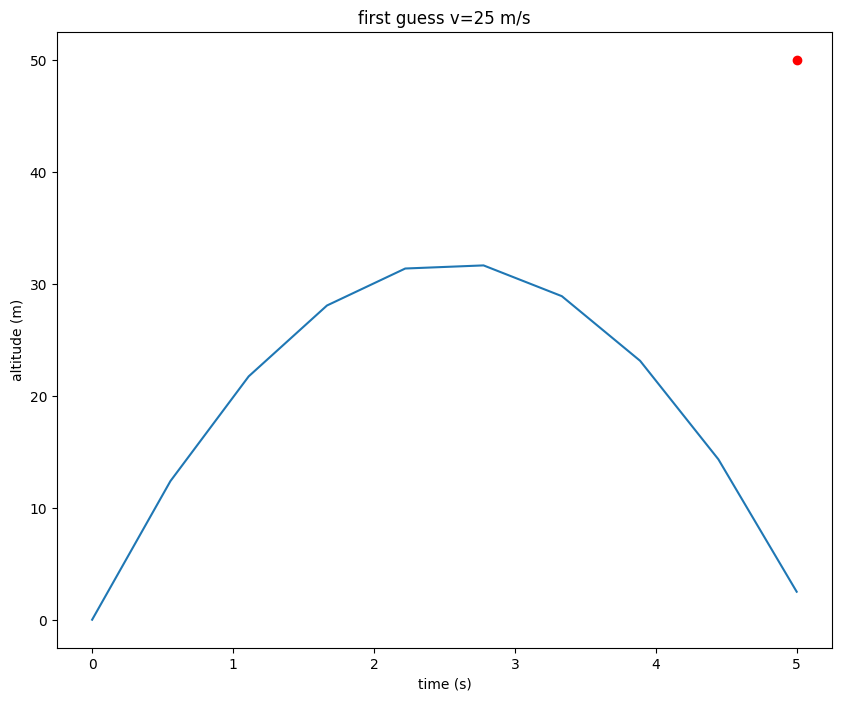

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



F = lambda t, s: np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)
t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 25
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)
plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, "ro")
plt.xlabel("time (s)")
plt.ylabel("altitude (m)")
plt.title(f"first guess v={v0} m/s")
plt.show()

In [9]:
from scipy.optimize import fsolve
def objective(v0):
    sol = solve_ivp(F, [0, 5], np.asarray([y0, v0], dtype=object),method='RK45',t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50
v0, = fsolve(objective, 10)
print(v0)

34.499999999999986
